In [1]:
import numpy as np
import torch
import crocoddyl


from terminal_unicycle import FeedforwardUnicycle
from dataset import Datagen
from value_network import ValueNet
from solver import solve_problem
from utils import plot_trajectories

val_net = torch.load("../networks/value.pth")

In [2]:
# Generate n starting positions from the circumference of circles of radius of r.
configs   = Datagen.circular_data(r=[2.0], n=[100])

xs    = []
value = []
iters = []

 Returning [100] points from the circumference of a circle of radii [2.0]


In [3]:
# Solve the problem with terminal unicycle

for starting_position in configs:
    terminal = FeedforwardUnicycle(val_net)                           # Create the terminal model
    
    ddp = solve_problem(terminal_model = terminal,                    # Solve the problem
                        initial_configuration = starting_position,
                        precision = 1e-5,                             # Set ddp.th_stop
                        maxiters = 1000)                              # maxiters
        
    xs.append(np.array(ddp.xs))
    value.append(ddp.cost)
    iters.append(ddp.iter)

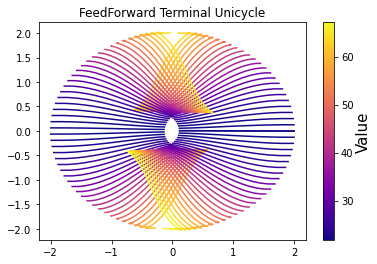

In [4]:
plot_trajectories(value, xs, name = 'Value', title = 'FeedForward Terminal Unicycle' )

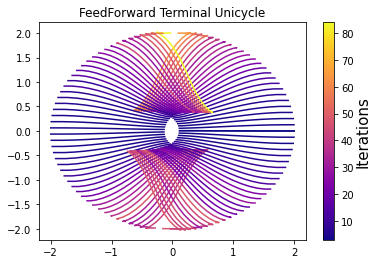

In [5]:
plot_trajectories(iters, xs, name = 'Iterations', title = 'FeedForward Terminal Unicycle' )